## GD(gradient descent)
비용함수를 최소화하기 위해 반복하는 파라미터를 조정

$\theta$에 대한 비용함수의 `gradient`가 감소하는 방향으로 $\theta'$를 수정

이때, 랜덤초기화(즉 임의의 값 $\theta$에서 시작)

이때 step의 크기를 `학습률`파라미터로 결정

* 참고          
`전역 최솟값`을 찾는게 베스트.          
`지역 최솟값`을 찾았다고 `전역 최솟값`을 찾았다고 판단하지 않게 주의            
`parameter space`에서 최적의 해를 찾아야 한다.

### step 1. 배치 경사 하강법

하나의 $\theta_j \in \Theta$(parameter space) 에 대한 `residual deriative`는 아래와 같다

$\frac{\partial}{\partial \theta_j} MSE(\theta)=\frac{2}{m}\sum_{j=1}^{m}(\theta^T x^i - y^i)x_j^i$

따라서 우리는 아래의 그래디언트 벡터 $\nabla_\theta MSE(\theta) 를 고려할 수 있다$

$\nabla_\theta MSE=(\frac{\partial}{\partial \theta_1} MSE(\theta),..,\frac{\partial}{\partial \theta_n} MSE(\theta))$

책의 설명과 다르게 이해하자면 n차원에서의 미분가능성을 가정한다면, 우리는 optimization problem을 풀기 위해 위의 그래디언트 값이 0에 수렴해야한다.
따라서 $\theta$값의 변화를 주어야하는데 그래디언트 값이 0으로 수렴시키기 위해 아래의 값을 고려한다

$\theta^{(next-step)}=\theta-\eta \nabla_\theta MSE(\theta)$, where $\eta$ =학습률

### step 2. 확률적 경사 하강법(SGD)

위의 parameter search 방법이 좋다는 것을 이해하고 난 뒤, 우리는 계산량이 굉장히 많다는 것을 알 수 있다

매 스텝헤서 한 개의 랜덤샘플을 통해 그래디언트를 계산하고 계산량을 크게 줄일 수 있지만, 문제는 그래디언트가 요동치므로 최적값에 도착할 수 없다

하지만 요동치므로 `지역최솟값`을 건너뛸 수 있는 장점이 있는데 알고리즘이 `전역최솟값`에 도달할 수 있게 학습률을 점진적으로 감소시켜야한다.

매 반복마다 학습률을 계산하는 함수를 `learning schedule`

또한 한 반복에서 되풀이되는 횟수를 `epoch`(에포크)라고 한다

In [2]:
import sklearn.linear_model as sklin
import numpy as np
np.random.seed(10)
sgd_model=sklin.SGDRegressor(random_state=10,warm_start=True,max_iter=1000,early_stopping=True,tol=1e-6,eta0=0.01,n_iter_no_change=100,penalty=None)

위의 코드를 설명하면,
- 1. 1000번의 `epoch`동안 실행
- 2. 100번의 `epoch`동안 `1e-6`보다 작은 `mse`값이 반복되면 중지된다.
- 3. 훈련률은 `0.01`이다.
- 4. `warm start=True`이므로 훈련이 중지된 시점에서 다시 훈련시킬 수 있다.

In [3]:
import pandas as pd
data=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\공부파일들\데이콘\서울시 기후예측\train.csv")
nan_data=data.copy()
nan_data.dropna(axis=0,inplace=True)

In [5]:
sgd_model.fit(X=nan_data[["최고기온"]],y=nan_data["평균기온"])

SGDRegressor(early_stopping=True, n_iter_no_change=100, penalty=None,
             random_state=10, tol=1e-06, warm_start=True)

In [7]:
print(sgd_model.coef_,sgd_model.intercept_)

[0.97748221] [-3.43080979]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


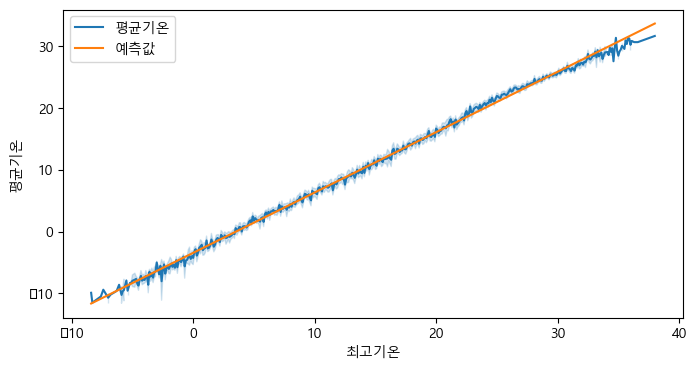

In [11]:
plt.figure(figsize=(8,4))
sb.lineplot(x=nan_data["최고기온"],y=nan_data["평균기온"],label="평균기온")
sb.lineplot(x=nan_data["최고기온"],y=sgd_model.predict(X=nan_data[["최고기온"]]),label="예측값")
plt.show()

### step3. mini batch gredient descent

위의 배치 경사 하강법은 하나의 샘플에 대한 그래디언트를 계산한다면, 미니 배치 경사하강법은 하나의 작은 샘플에 대한 그래디언트를 계산한다